In [1]:
import statistics
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotx

# plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_columns', None)

In [2]:
two_df = pd.read_pickle("twitter_date_master_timeslice_two_remainder_actor_filtered_usc_ta1.p")
two_df.drop(["id"], axis=1)
print(len(two_df))
# two_df.head(10)
one_df = pd.read_pickle("twitter_date_master_both_timeslice_one_remainder_actor_filterd_usc_ta1.p")
print(len(one_df))
all_df = pd.concat([one_df, two_df])
print(len(all_df))
# print(all_df.head(10))
# all_df = all_df[all_df["timePublished"] >= 1493190000000]
# all_df = all_df[all_df["timePublished"] <= 1496127599000]
# print(len(all_df))

1729921
3586082
5316003


2017-02-17: 1243
2017-02-18: 5471
2017-02-19: 18958
2017-02-20: 12539
2017-02-21: 26374
2017-02-22: 24527
2017-02-23: 30858
2017-02-24: 19432
2017-02-25: 13224
2017-02-26: 15922
2017-02-27: 12904
2017-02-28: 14418
2017-03-01: 25231
2017-03-02: 32341
2017-03-03: 16762
2017-03-04: 20053
2017-03-05: 38837
2017-03-06: 25727
2017-03-07: 31683
2017-03-08: 27548
2017-03-09: 28320
2017-03-10: 19024
2017-03-11: 16521
2017-03-12: 26212
2017-03-13: 27898
2017-03-14: 27345
2017-03-15: 32800
2017-03-16: 36408
2017-03-17: 25191
2017-03-18: 35142
2017-03-19: 50561
2017-03-20: 70450
2017-03-21: 45842
2017-03-22: 37939
2017-03-23: 46444
2017-03-24: 38436
2017-03-25: 27552
2017-03-26: 42292
2017-03-27: 40176
2017-03-28: 44639
2017-03-29: 44906
2017-03-30: 35220
2017-03-31: 48224
2017-04-01: 60261
2017-04-02: 64189
2017-04-03: 57571
2017-04-04: 85820
2017-04-05: 63031
2017-04-06: 86727
2017-04-07: 79550
2017-04-08: 76180
2017-04-09: 92813
2017-04-10: 80041
2017-04-11: 85786
2017-04-12: 94804
2017-04-13: 

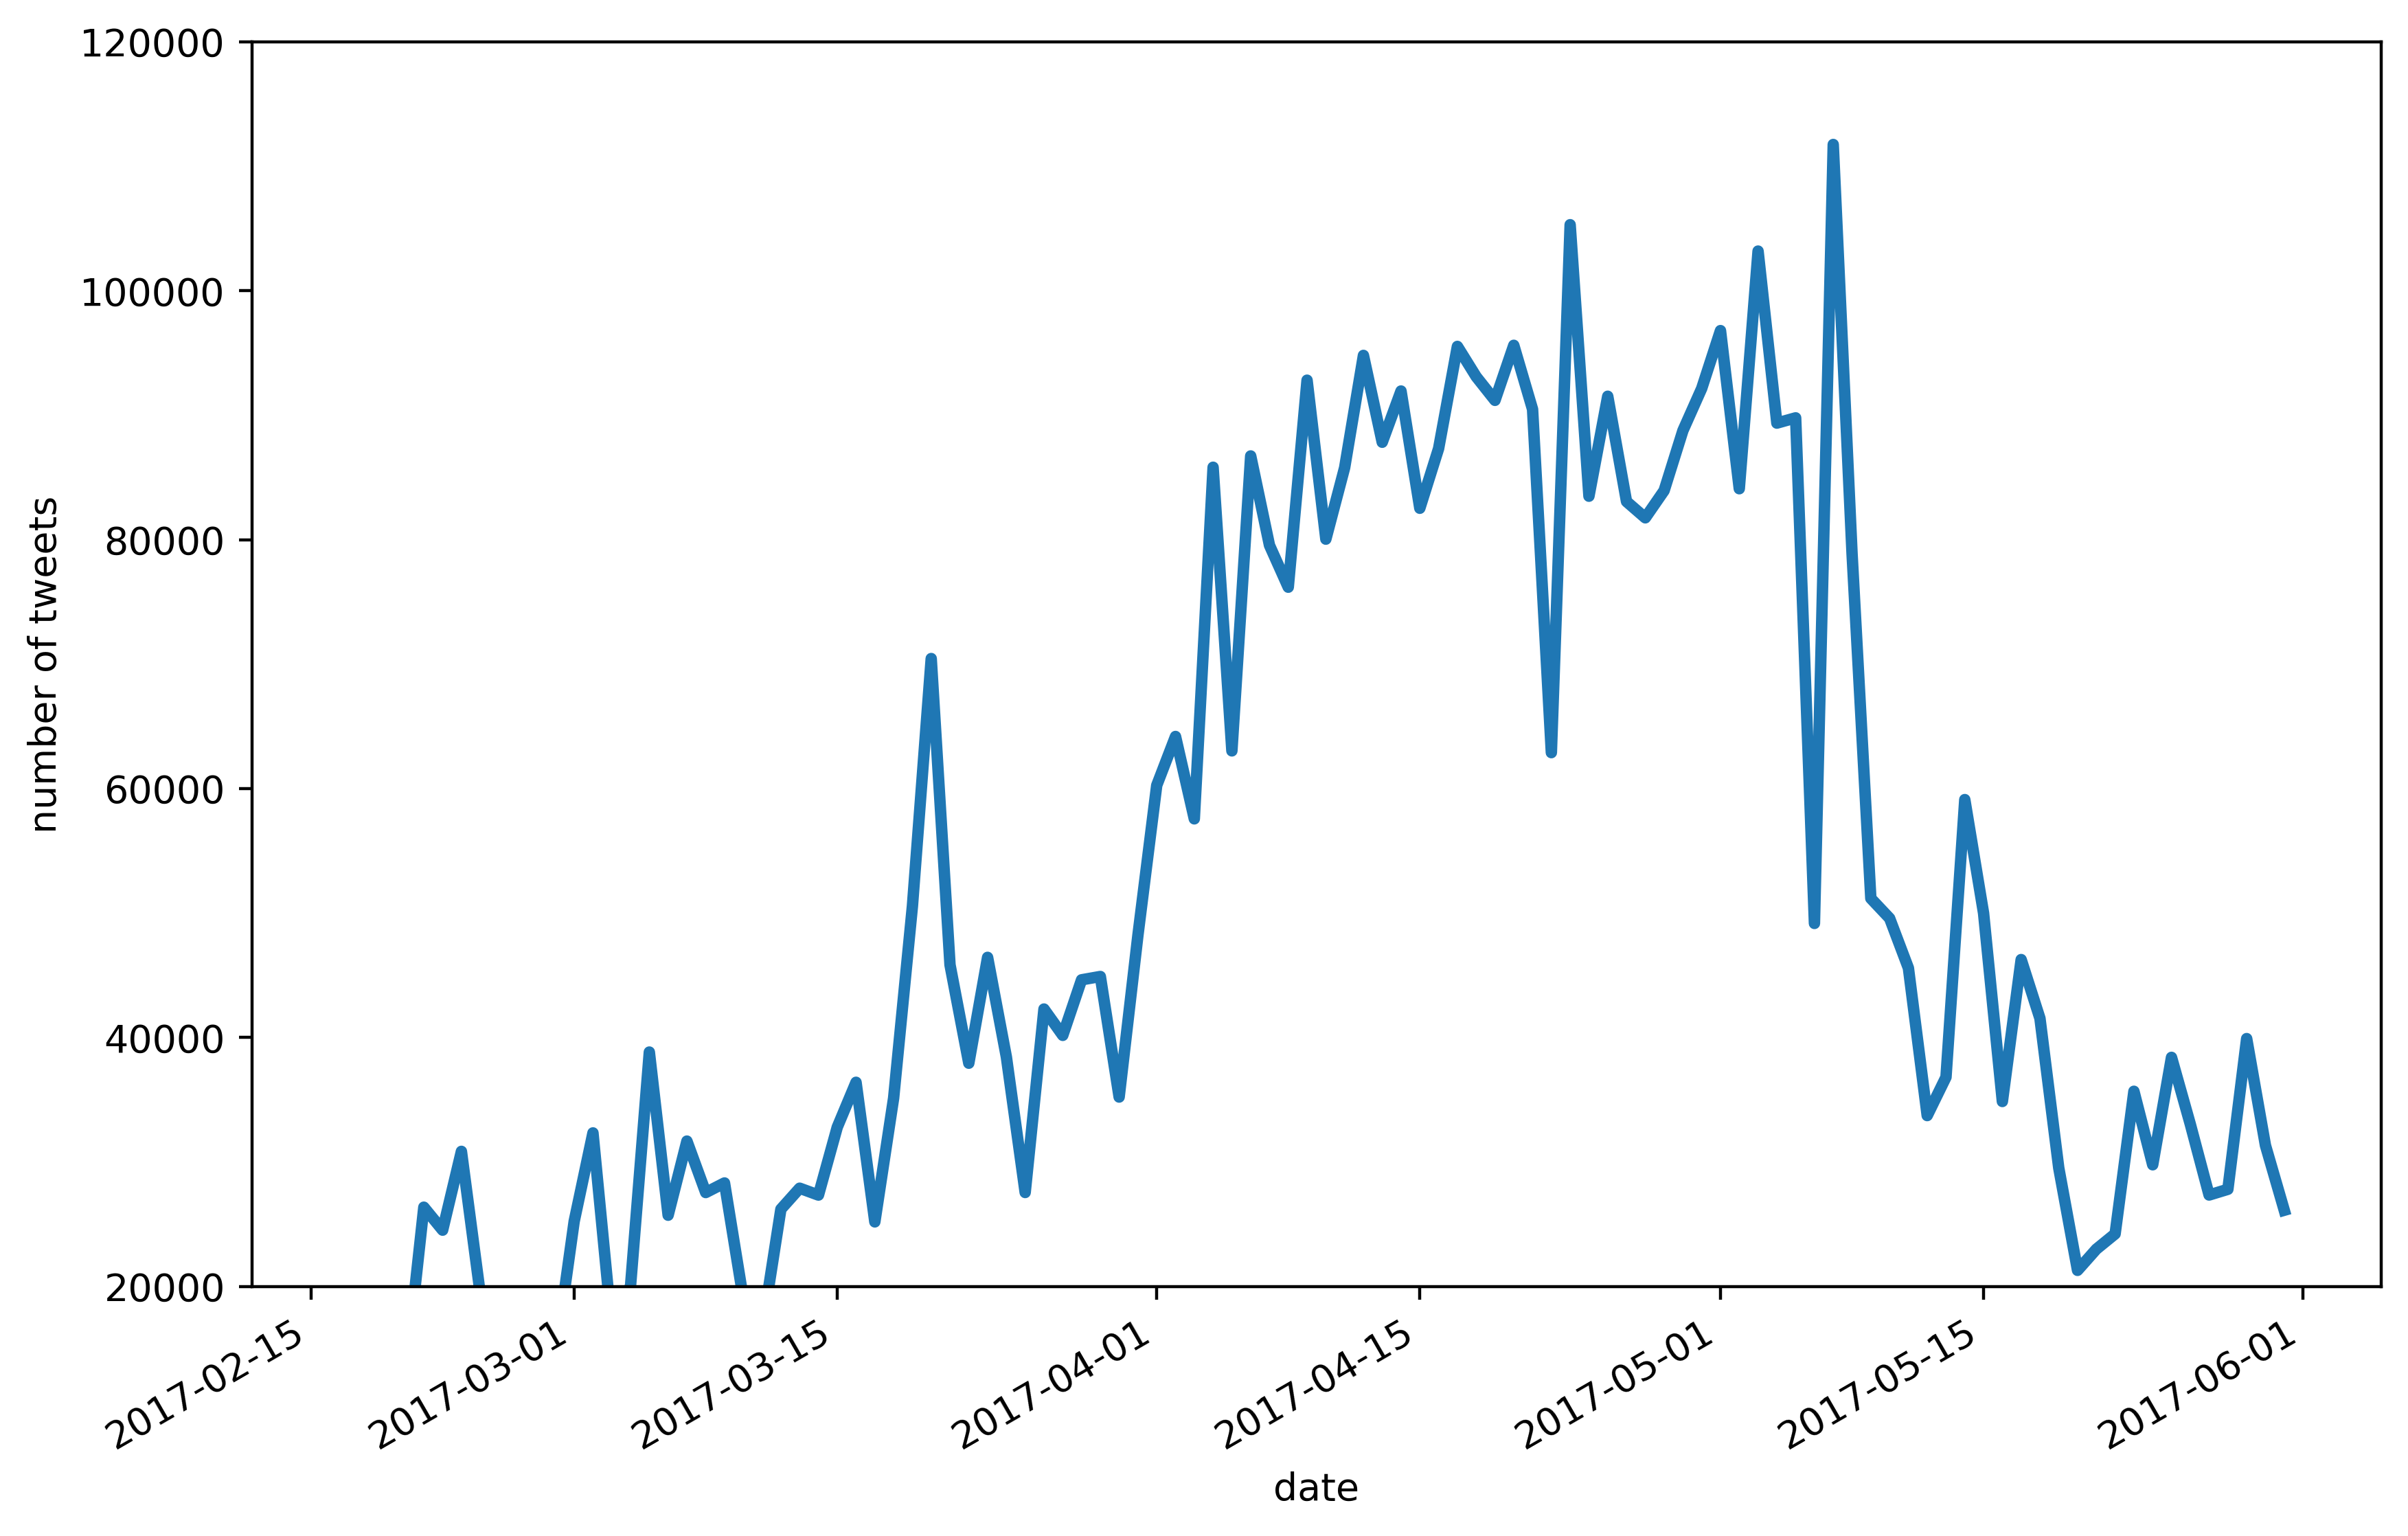

In [3]:
date_list =all_df["date"].tolist()
date_set = set(date_list)
# print(date_set)

date_dict = Counter(date_list)
# print(date_dict)

for k, v in date_dict.items():
    print("{}: {}".format(k, v))

date_df = pd.DataFrame(list(date_dict.items()),
                      columns=['date','times'])

plt.figure(dpi=400, figsize=(10,6))
plt.plot(date_df['date'],date_df['times'], linewidth=3)
# sns.lineplot(x="date", y="times", data=date_df, marker="o")

# date_df.plot(x="date", y="times", style='.-')
# plt.yscale("log")
# plt.grid(True)
plt.xlabel("date")
plt.ylabel("number of tweets")
# x_low = pd.to_datetime(datetime.fromtimestamp(1493190000)).date()
# x_up = pd.to_datetime(datetime.fromtimestamp(1496127599)).date()
#
# plt.xlim(x_low,x_up)
plt.ylim(20000, 120000)
plt.xticks(rotation=30, ha='right')
# plt.title("Distribution of tweet data over date (one reminder)")
# plt.legend()
# plt.savefig("times_5k")
plt.show()

In [4]:
# tweet_type_list = two_df["engagementType"].tolist()
# tweet_type_set = set(tweet_type_list)
# tweet_type_set

In [5]:
# date_list = date_df["date"].tolist()
# date_set = set(date_list)
# date_list2 = list(date_set)
# x = np.arange(1, len(date_list2)+1)

In [6]:
tweet_df = all_df[all_df["engagementType"] == "tweet"]
reply_df = all_df[all_df["engagementType"] == "reply"]
retweet_df = all_df[all_df["engagementType"] == "retweet"]

In [7]:
def to_num_date_df(df):
    date_list =df["date"].tolist()
    date_set = set(date_list)
    # print(date_set)

    date_dict = Counter(date_list)
    # print(date_dict)

    for k, v in date_dict.items():
        print("{}: {}".format(k, v))

    date_df = pd.DataFrame(list(date_dict.items()),
                          columns=['date','times'])
    return date_df

In [19]:
date_tweet_df = to_num_date_df(tweet_df)
date_reply_df = to_num_date_df(reply_df)
date_retweet_df = to_num_date_df(retweet_df)

plt.figure(dpi=1000, figsize=(12, 6))
plt.plot(date_tweet_df['date'],date_tweet_df['times'], label="tweet", linewidth=3)
plt.plot(date_reply_df['date'],date_reply_df['times'], label="reply", linewidth=3)
plt.plot(date_retweet_df['date'],date_retweet_df['times'], label="retweet", linewidth=3)

plt.vlines(x=np.datetime64('2017-04-23'), ymin=0, ymax=80000, linestyle='solid', linewidth=2, colors="r", label="round 1")

plt.vlines(x=np.datetime64('2017-05-07'), ymin=0, ymax=80000, linestyle='dashed', linewidth=2, colors="r", label="round 2")

plt.vlines(x=np.datetime64('2017-04-10'), ymin=0, ymax=80000, linestyle='dotted', linewidth=2, colors="r", label="start of the campaign")

# plt.vlines(x=np.datetime64('2017-05-01'), ymin=0, ymax=70000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-03'), ymin=0, ymax=74000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-05'), ymin=0, ymax=61000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-07'), ymin=0, ymax=80000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-08'), ymin=0, ymax=56000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-13'), ymin=0, ymax=26000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-19'), ymin=0, ymax=20000, linestyle='dashed', linewidth=2, colors="r")

# plt.yscale("log")
# plt.grid(True)
plt.xlabel("date")
plt.ylabel("number of tweets")
# plt.ylim(0, 90000)
plt.xticks(rotation=30, ha='right')
# plt.title("Distribution of tweet, retweet and reply over date (part)")
plt.legend()
# plt.savefig("times_5k")
plt.show()

2017-02-17: 106
2017-02-18: 498
2017-02-19: 1556
2017-02-20: 1466
2017-02-21: 2840
2017-02-22: 2748
2017-02-23: 3179
2017-02-24: 1837
2017-02-25: 1159
2017-02-26: 1349
2017-02-27: 1251
2017-02-28: 1254
2017-03-01: 2855
2017-03-02: 3361
2017-03-03: 1627
2017-03-04: 1579
2017-03-05: 3050
2017-03-06: 2220
2017-03-07: 2707
2017-03-08: 2239
2017-03-09: 2705
2017-03-10: 1635
2017-03-11: 1237
2017-03-12: 1984
2017-03-13: 2254
2017-03-14: 2554
2017-03-15: 2551
2017-03-16: 3082
2017-03-17: 2313
2017-03-18: 2889
2017-03-19: 4327
2017-03-20: 9689
2017-03-21: 3309
2017-03-22: 2948
2017-03-23: 4571
2017-03-24: 3199
2017-03-25: 2531
2017-03-26: 2927
2017-03-27: 2933
2017-03-28: 3660
2017-03-29: 4285
2017-03-30: 2694
2017-03-31: 2902
2017-04-01: 3982
2017-04-02: 4287
2017-04-03: 4071
2017-04-04: 9336
2017-04-05: 4860
2017-04-06: 7670
2017-04-07: 5139
2017-04-08: 5028
2017-04-09: 5728
2017-04-10: 5439
2017-04-11: 5376
2017-04-12: 5604
2017-04-13: 5407
2017-04-14: 5313
2017-04-15: 4729
2017-04-16: 4887